In [1]:
import random
import networkx as nx
import torch

from deep_ebm.utils_ebm import show_graph, evaluate_model
from deep_ebm.utils_ebm import save_graph, compare_graphs, show_graph_grid, compare_statistics
from deep_ebm.gnn_ebm import GraphDataset, GNN_EBM, train_one_epoch_pcd, gibbs_ministeps

from Plots_and_utils.plots import *
import pickle as pkl

device = torch.device("cpu")

---

In [2]:
with open("data/30IEEE_synth_dataset/reduced_30IEEE_synth_list_GraphDataset.pkl", "rb") as f:
    dataset_30IEEE = pkl.load(f)

with open("Saved_models/30IEEE_GNN_EBM_30epochs.pkl", "rb") as f:
    model_30IEEE_30epochs = pkl.load(f)

with open("Saved_models/30IEEE_GNN_EBM_50epochs_200GS.pkl", "rb") as f:
    model_30IEEE_50epochs_200GS = pkl.load(f)

In [3]:
metrics10_1 = evaluate_model(model_30IEEE_30epochs, dataset_30IEEE, device, num_graphs=1000, gibbs_steps=10)
metrics100_1 = evaluate_model(model_30IEEE_30epochs, dataset_30IEEE, device, num_graphs=1000, gibbs_steps=100)
metrics500_1 = evaluate_model(model_30IEEE_30epochs, dataset_30IEEE, device, num_graphs=1000, gibbs_steps=500)
metrics1000_1 = evaluate_model(model_30IEEE_30epochs, dataset_30IEEE, device, num_graphs=1000, gibbs_steps=1000)

In [4]:
metrics10_2 = evaluate_model(model_30IEEE_50epochs_200GS, dataset_30IEEE, device, num_graphs=1000, gibbs_steps=10)
metrics100_2 = evaluate_model(model_30IEEE_50epochs_200GS, dataset_30IEEE, device, num_graphs=1000, gibbs_steps=100)
metrics500_2 = evaluate_model(model_30IEEE_50epochs_200GS, dataset_30IEEE, device, num_graphs=1000, gibbs_steps=500)
metrics1000_2 = evaluate_model(model_30IEEE_50epochs_200GS, dataset_30IEEE, device, num_graphs=1000, gibbs_steps=1000)

In [5]:
print("Metrics after 10 Gibbs steps(model 1):", metrics10_1)
print("Metrics after 100 Gibbs steps(model 1):", metrics100_1)
print("Metrics after 500 Gibbs steps(model 1):", metrics500_1)
print("Metrics after 1000 Gibbs steps(model 1):", metrics1000_1)


Metrics after 10 Gibbs steps(model 1): {'degree_mmd': 0.017369017969426706, 'clustering_mmd': 0.0018744156424101988}
Metrics after 100 Gibbs steps(model 1): {'degree_mmd': 0.039250210583661786, 'clustering_mmd': 0.0663098582877748}
Metrics after 500 Gibbs steps(model 1): {'degree_mmd': 0.03697972294742329, 'clustering_mmd': 0.4041873829791758}
Metrics after 1000 Gibbs steps(model 1): {'degree_mmd': 0.03662650554741174, 'clustering_mmd': 0.5930792415237085}


In [6]:
print("Metrics after 10 Gibbs steps(model 2):", metrics10_2)
print("Metrics after 100 Gibbs steps(model 2):", metrics100_2)
print("Metrics after 500 Gibbs steps(model 2):", metrics500_2)
print("Metrics after 1000 Gibbs steps(model 2):", metrics1000_2)


Metrics after 10 Gibbs steps(model 2): {'degree_mmd': 0.014473623602671265, 'clustering_mmd': 0.0005668162828333934}
Metrics after 100 Gibbs steps(model 2): {'degree_mmd': 0.03264196171167991, 'clustering_mmd': 0.03646027771503646}
Metrics after 500 Gibbs steps(model 2): {'degree_mmd': 0.034317042744824625, 'clustering_mmd': 0.13608411672645926}
Metrics after 1000 Gibbs steps(model 2): {'degree_mmd': 0.03363762391174, 'clustering_mmd': 0.1715831952176361}


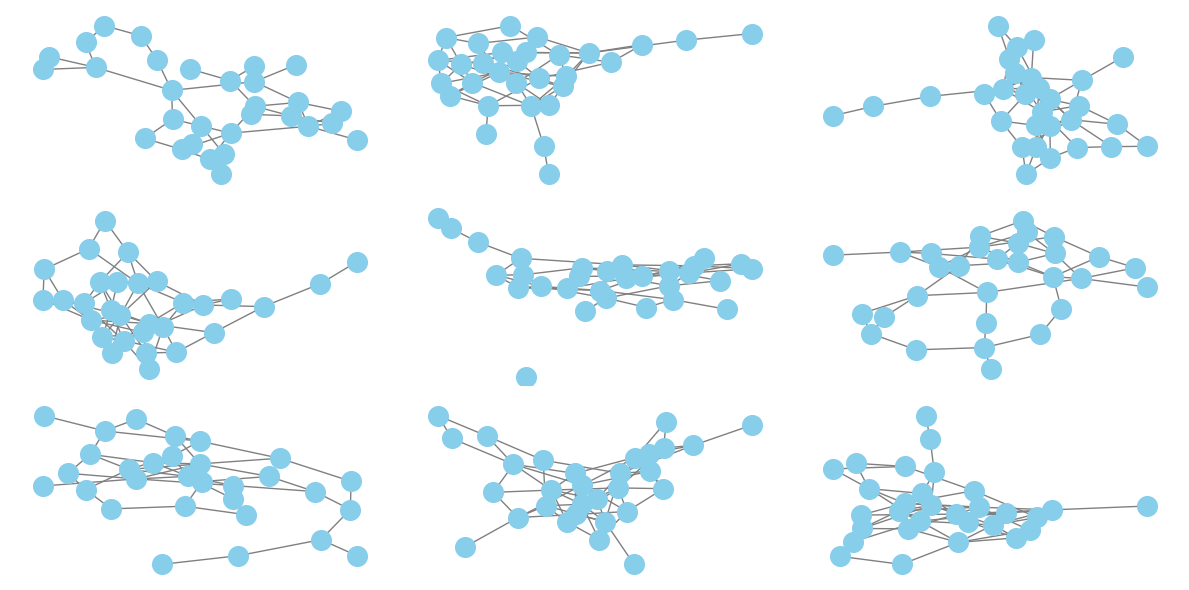

=== Graph Statistics Comparison ===
Real graphs: 350 graphs
  Avg nodes:      30.00
  Avg edges:      41.33
  Avg degree:     2.76
  Avg clustering: 0.067
Generated graphs: 350 graphs
  Avg nodes:      30.00
  Avg edges:      54.12
  Avg degree:     3.61
  Avg clustering: 0.110


({'num_graphs': 350,
  'avg_nodes': np.float64(30.0),
  'avg_edges': np.float64(41.325714285714284),
  'avg_degree': np.float64(2.755047619047619),
  'avg_clustering': np.float64(0.06655071806500379),
  'avg_algebraic_connectivity': np.float64(0.18701129523579027)},
 {'num_graphs': 350,
  'avg_nodes': np.float64(30.0),
  'avg_edges': np.float64(54.11714285714286),
  'avg_degree': np.float64(3.607809523809524),
  'avg_clustering': np.float64(0.10974819624819625),
  'avg_algebraic_connectivity': np.float64(0.2818042438146458)})

In [4]:
generated = []
with torch.no_grad():
    for i in range(350):
        A, feats = dataset_30IEEE[i]
        A_gen = gibbs_ministeps(A, model_30IEEE_50epochs_200GS, feats.to(device), device, mini_steps=200)
        G_gen = nx.from_numpy_array(A_gen.cpu().numpy())
        generated.append(G_gen) 

show_graph_grid(generated, rows=3, cols=3, layout="spring")

compare_statistics(dataset_30IEEE.graphs, generated)


In [5]:
c = 0
for g in generated:
    if not nx.is_connected(g):
        c += 1

print(f"Number of disconnected generated graphs: {c} over {len(generated)} generated graphs")

Number of disconnected generated graphs: 64 over 350 generated graphs
